In [1]:
import json
from pathlib import Path

annotation_data_path = Path("/local/scratch/carlyn.1/datasets/animalpose/keypoints.json")

with open(annotation_data_path, 'r') as f:
    ann_data = json.load(f)

ann_data.keys()

dict_keys(['images', 'annotations', 'categories', 'info'])

In [2]:
print(ann_data['categories'][0])

{'supercategory': 'animal', 'id': 1, 'name': 'dog', 'keypoints': ['left_eye', 'right_eye', 'nose', 'left_ear', 'right_ear', 'left_front_elbow', 'right_front_elbow', 'left_back_elbow', 'right_back_elbow', 'left_front_knee', 'right_front_knee', 'left_back_knee', 'right_back_knee', 'left_front_paw', 'right_front_paw', 'left_back_paw', 'right_back_paw', 'throat', 'withers', 'tailbase'], 'skeleton': [[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 17], [18, 19], [5, 9], [6, 10], [7, 11], [8, 12], [9, 13], [10, 14], [11, 15], [12, 16]]}


In [3]:
for cat_info in ann_data['categories']:
    print(cat_info['id'], cat_info['name'])
    
# 33 giraffe

1 dog
2 cat
3 sheep
4 horse
5 cow


In [4]:
for key, value in ann_data['annotations'][0].items():
    print(key, value)

image_id 1
bbox [123, 115, 379, 275]
keypoints [[193, 216, 1], [160, 217, 1], [174, 261, 1], [204, 186, 1], [152, 182, 1], [0, 0, 0], [0, 0, 0], [273, 168, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [266, 225, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [190, 145, 1], [351, 238, 1]]
num_keypoints 20
category_id 1


In [5]:
ann_data["info"]

{'description': 'Animal Pose dataset from ICCV 2021 paper Cross-Domain Adaptation for Animal Pose Estimation',
 'url': 'https://sites.google.com/view/animal-pose/',
 'github': 'https://github.com/noahcao/animal-pose-dataset.git',
 'contributor': 'Jinkun Cao, Hongyang Tang and Tencent Youtu X lab team',
 'date_updated': '2021/7/14',
 'resource': 'some images come from PASCAL VOC2011 dataset, whose are named as $year_$index.jpg, the other images are from public online resources'}

In [6]:
import os
import shutil

# We have to extract images from pascal 2011
path_to_pascal_voc = Path("/local/scratch/carlyn.1/datasets/animalpose/voc/TrainVal/VOCdevkit/VOC2011/JPEGImages")
animalpose_image_dir = Path("/local/scratch/carlyn.1/datasets/animalpose/images")

#for k, v in ann_data["images"].items():
#    if len(v.split("_")) > 1: # Must be pascal image naming
#        src = path_to_pascal_voc / v
#        dest = animalpose_image_dir / v
#        if not os.path.exists(src):
#            print(f"{src} does not exist.")
#        shutil.copyfile(src, dest)


In [7]:
import os
# Count number of data files (10015 files)
total = 0
for root, dirs, files in os.walk(Path("/local/scratch/carlyn.1/datasets/animalpose/images")):
    print(root)
    total += len(files)

print(total)
print(len(ann_data['images']))

/local/scratch/carlyn.1/datasets/animalpose/images
4608
4608


In [8]:
ann_data['annotations'][0]

{'image_id': 1,
 'bbox': [123, 115, 379, 275],
 'keypoints': [[193, 216, 1],
  [160, 217, 1],
  [174, 261, 1],
  [204, 186, 1],
  [152, 182, 1],
  [0, 0, 0],
  [0, 0, 0],
  [273, 168, 1],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [266, 225, 1],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [190, 145, 1],
  [351, 238, 1]],
 'num_keypoints': 20,
 'category_id': 1}

In [9]:
ann_point = ann_data['annotations'][0]
img_local_path = ann_data['images'][str(ann_point['image_id'])]

img_path = Path("/local/scratch/carlyn.1/datasets/animalpose/images") / img_local_path
img_path

PosixPath('/local/scratch/carlyn.1/datasets/animalpose/images/2007_000063.jpg')

In [10]:
# Based on the file here: https://github.com/AlexTheBad/AP-10K/blob/main/tools/dataset/parse_animalpose_dataset.py
# It seems that the format is <x>, <y>, <is_valid>, <x2>, <y2>, <is_valid2>, ...?
# As long as the <is_valid> is not 0, it should be good. Even though the file only puts either 0 or 2

keypoints = []
print(ann_point['keypoints'])
for x, y, is_valid in ann_point['keypoints']:
    if is_valid > 0:
        keypoints.append((x, y))
keypoints

[[193, 216, 1], [160, 217, 1], [174, 261, 1], [204, 186, 1], [152, 182, 1], [0, 0, 0], [0, 0, 0], [273, 168, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [266, 225, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [190, 145, 1], [351, 238, 1]]


[(193, 216),
 (160, 217),
 (174, 261),
 (204, 186),
 (152, 182),
 (273, 168),
 (266, 225),
 (190, 145),
 (351, 238)]

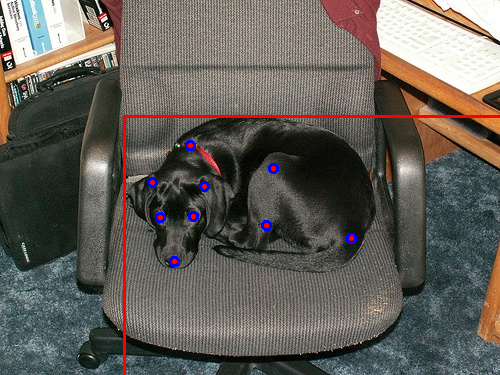

In [11]:
from PIL import Image, ImageDraw

img = Image.open(img_path)

imd = ImageDraw.Draw(img)

r = 5
for x, y in keypoints:
    imd.ellipse((x-r, y-r, x+r, y+r), fill='red', outline='blue', width=3)
    
x, y, w, h = ann_point['bbox']
imd.rectangle((x, y, x+w, y+h), fill=None, outline='red', width=3)

img

In [12]:
ann_data['categories'][1]['skeleton']

[[0, 1],
 [0, 2],
 [1, 2],
 [0, 3],
 [1, 4],
 [2, 17],
 [18, 19],
 [5, 9],
 [6, 10],
 [7, 11],
 [8, 12],
 [9, 13],
 [10, 14],
 [11, 15],
 [12, 16]]

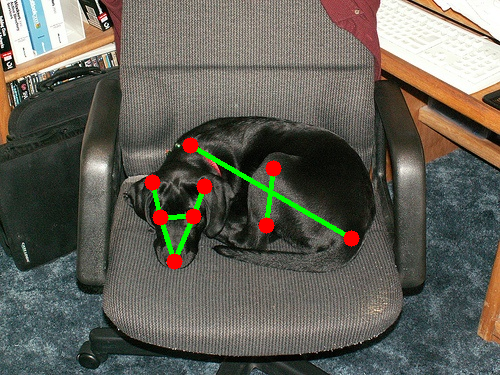

In [17]:
import numpy as np
from mmengine.structures import InstanceData
from mmpose.structures import PoseDataSample
from mmpose.visualization import PoseLocalVisualizer


keypoints = []
is_visible_pts = []
for x, y, is_visible in ann_point['keypoints']:
    keypoints.append([x, y])
    is_visible_pts.append(is_visible)
    
    
skeleton = ann_data['categories'][ann_point['category_id']]['skeleton']

pose_local_visualizer = PoseLocalVisualizer(
    radius=8,
    line_width=3,
    link_color='green'
)
image=np.array(Image.open(img_path))
gt_instances = InstanceData()
gt_instances.keypoints = np.array([keypoints])
gt_instances.keypoints_visible = np.array([is_visible_pts])
gt_pose_data_sample = PoseDataSample()
gt_pose_data_sample.gt_instances = gt_instances
dataset_meta = {'skeleton_links': ann_data['categories'][ann_point['category_id']]['skeleton']}
pose_local_visualizer.set_dataset_meta(dataset_meta)
pose_img = pose_local_visualizer.add_datasample(
    'image',
    image,
    gt_pose_data_sample,
    draw_pred=False
)

#
Image.fromarray(pose_img)
